<a href="https://colab.research.google.com/github/jakubtwalczak/dsbootcampudemy/blob/main/8_Wizualizacja_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wprowadzenie.

Seaborn to biblioteka programistyczna w języku Python, która jest używana do tworzenia atrakcyjnych i informatywnych wykresów statystycznych. Jest to oparta na Matplotlib biblioteka, która dostarcza wyższy poziom abstrakcji i łatwiejszy interfejs do tworzenia wykresów, szczególnie tych związanych z analizą danych i statystyką.



Główne cechy i funkcje biblioteki Seaborn:

1. **Wygodna integracja z danymi**: Seaborn jest zintegrowany z biblioteką Pandas, co oznacza, że można łatwo używać struktur danych DataFrame w Pandas do tworzenia wykresów. To ułatwia manipulację danymi i generowanie wykresów na podstawie istniejących zbiorów danych.

2. **Wykresy statystyczne**: Seaborn skupia się na wykresach statystycznych, takich jak wykresy punktowe, wykresy pudełkowe (box plots), wykresy rozkładu, wykresy wiolinowe, wykresy słupkowe itp. Dzięki tym wykresom można wizualizować rozkłady danych i relacje między nimi.

3. **Ustawienia domyślne estetyki**: Seaborn dostarcza przyjemne domyślne style i kolory do wykresów, co pozwala na tworzenie atrakcyjnych i czytelnych wykresów bez konieczności wielu ręcznych dostosowań.

4. **Wsparcie dla kolorów i palet**: Biblioteka oferuje szeroką gamę kolorów i palet kolorów, które można dostosować do konkretnych potrzeb wizualizacji danych.

5. **Dodatkowe funkcje do wizualizacji**: Seaborn posiada również dodatkowe funkcje do wizualizacji, takie jak funkcje do tworzenia macierzy korelacji, wykresy regresji, wykresy heatmap i wiele innych.

6. **Łatwa personalizacja**: Choć Seaborn dostarcza domyślnych ustawień, umożliwia także pełną personalizację wykresów, co pozwala dostosować je do konkretnych potrzeb projektu.

7. **Wysoka jakość wyjścia**: Wykresy generowane przez Seaborn są zazwyczaj w wysokiej jakości i gotowe do użycia w raportach, prezentacjach lub publikacjach.

8. **Aktywna społeczność**: Seaborn ma aktywną społeczność użytkowników i deweloperów, co oznacza, że istnieje wiele dostępnych źródeł, tutoriali i pomocy online.



Seaborn jest często wybierany przez analityków danych i naukowców danych do tworzenia wykresów statystycznych i wizualizacji danych, zwłaszcza w kontekście analizy eksploracyjnej. Dzięki swojej prostocie i estetyce pomaga w szybkim zrozumieniu danych i komunikowaniu wyników analizy.

Standardowym aliasem do importu biblioteki Seaborn jest sns.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Od razu ustawiamy domyślny styl biblioteki dla wykresów oraz sprawdzamy wersję.

In [2]:
sns.set()
sns.__version__

'0.13.1'

# Tips data.

Seaborn posiada wbudowaną bibliotekę zbiorów danych do wykorzystania na potrzeby demonstracji jego możliwości, do nauki itp. Załadujmy dane dot. napiwków, używając funkcji **load_dataset**, która załaduje zbiór do ramki danych.

In [3]:
df = sns.load_dataset('tips')

Oczywiście podejrzymy, co w zbiorze się znajduje.

In [4]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Oprócz danych liczbowych (float, integer) mamy też dane kategoryczne. Ułatwi to tworzenie wysokopoziomowych i czytelnych wizualizacji.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Opisując statystyki, wyróżnimy te dla zmiennych liczbowych, jak i dla zmiennych kategorycznych.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [7]:
df.describe(include=['category']).T

,count,unique,top,freq
sex,244,2,Male,157
smoker,244,2,No,151
day,244,4,Sat,87
time,244,2,Dinner,176


## Wykres relacyjny.

Zbadajmy relację między całkowitą wartością rachunku, a wysokością napiwku. Do tworzenia wykresów relacyjnych punktowych w Seabornie służy metoda **relplot**. Jako pierwszy argument podajemy zbiór danych, potem oś x, a na koniec oś y - to argumenty obligatoryjne, możemy oczywiście customizować wykres parametrami.

W całym notatniku będziemy wykresy przypisywać do zmiennych, aby nie wyświetlać informacji o obiekcie.

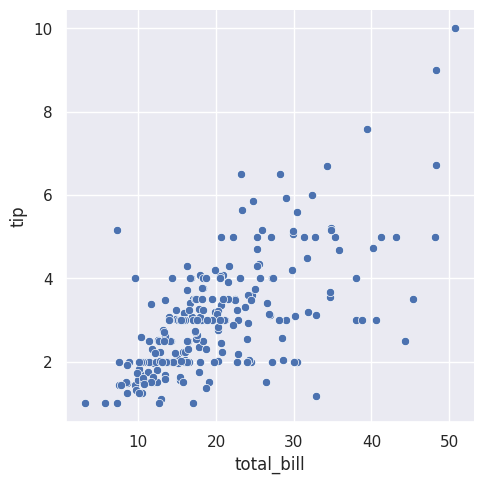

In [8]:
_ = sns.relplot(data=df, x='total_bill', y='tip')

Wykres wypisuje nam nazwy etykiet osi. Domyślnie nie są one zbyt duże, dlatego możemy przy pomocy metody **set** z parametrem font_scale ustalić wielkość fontu (ustalamy stosunek wielkości nowego fontu do starego).

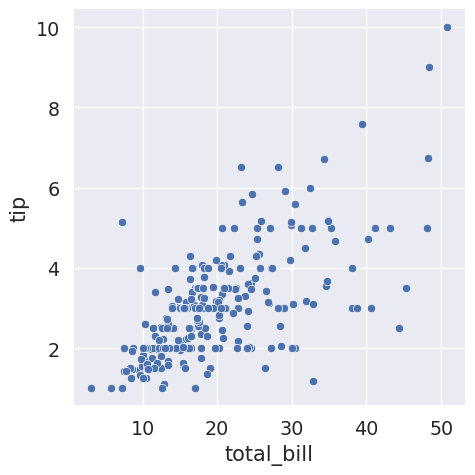

In [9]:
sns.set(font_scale=1.25)

_ = sns.relplot(data=df, x='total_bill', y='tip')

Dołożymy na nasz wykres parametry size i hue, które określą rozmiar kropki oraz odcień ze względu na kategorię. W obu wypadkach będzie to zmienna size.

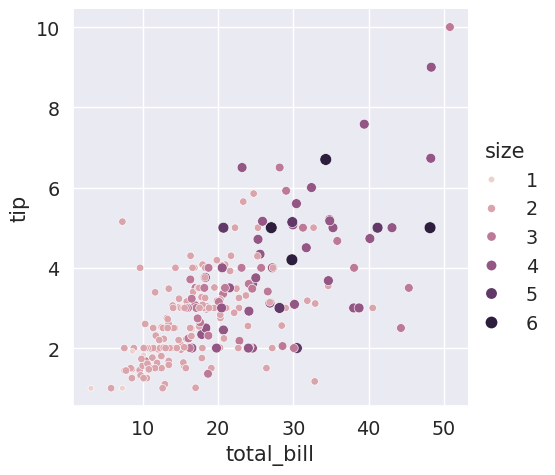

In [10]:
_ = sns.relplot(data=df, x='total_bill', y='tip', size='size', hue='size')

Dla najliczniejszych grup mamy dużą, ciemną kropkę. Im mniejsza grupa, tym mniejsza i jaśniejsza kropka.

Łatwiejsze niż w Matplotlib jest tworzenie subplotów. Podajemy parametr col lub row (przy czym dobrze wskazać zmienną kategoryczną o nieszczególnie dużej liczbie wartości). Różnica polega na tym, czy dane mają być w kolumnach (col), czy w wierszach (row).

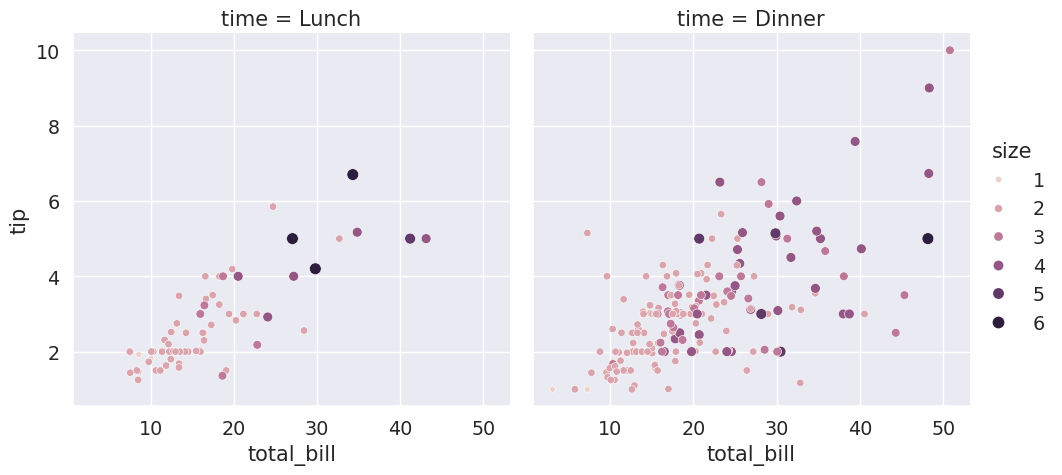

In [11]:
_ = sns.relplot(data=df, x='total_bill', y='tip', size='size', hue='size', col='time')

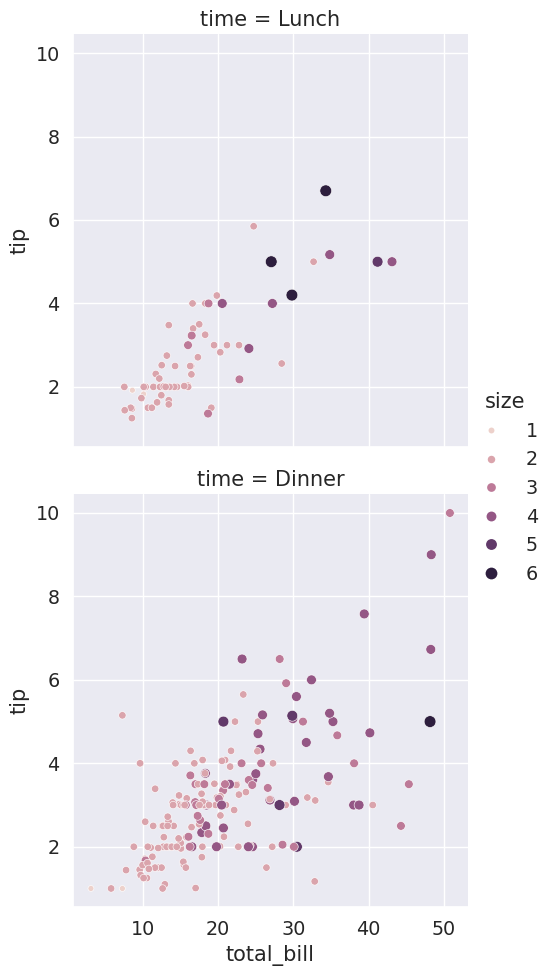

In [12]:
_ = sns.relplot(data=df, x='total_bill', y='tip', size='size', hue='size', row='time')

Obu tych parametrów możemy używać jednocześnie. Otrzymamy wtedy bardziej rozbudowaną siatkę wykresów.

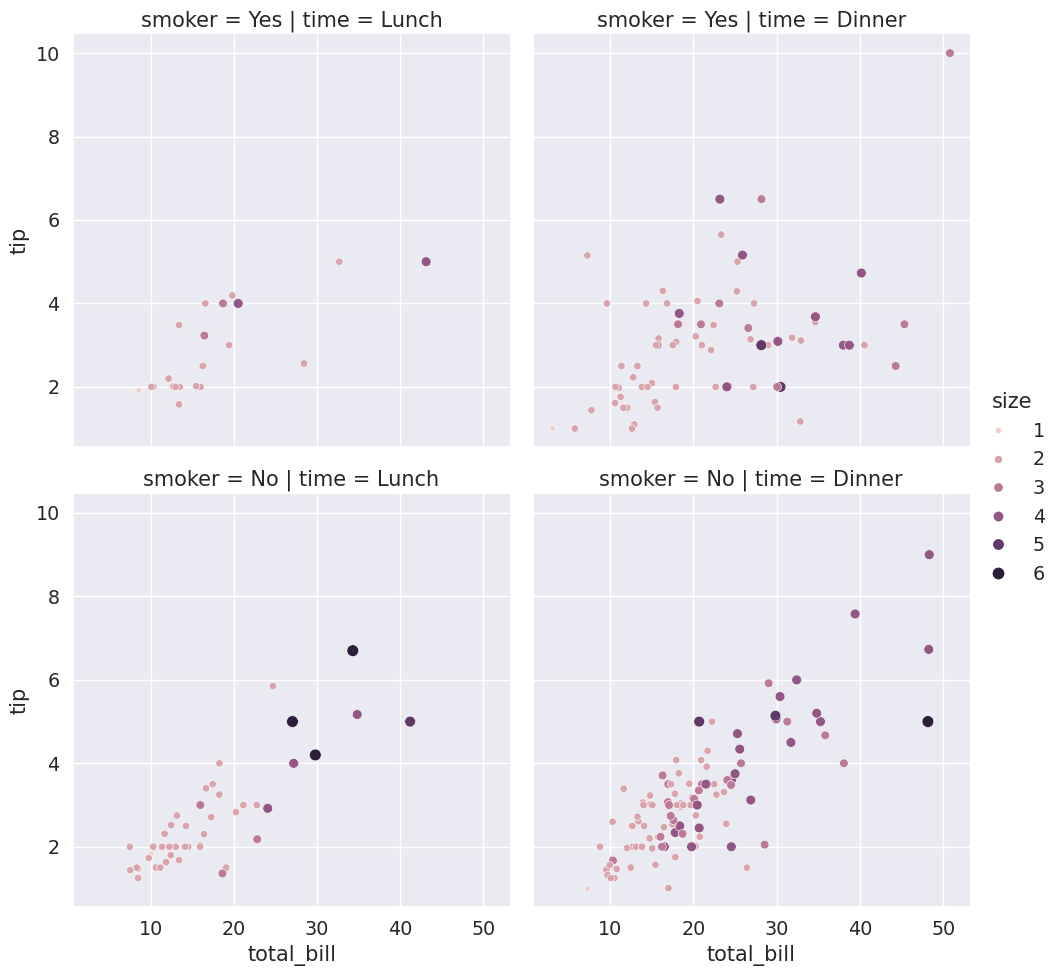

In [13]:
_ = sns.relplot(data=df, x='total_bill', y='tip', size='size', hue='size', row='smoker', col='time')

## Wykresy dla zmiennych kategorycznych.

Odpowiednim wykresem dla kategorii jest **catplot**. Podamy tym razem zmienną day i total_bill.

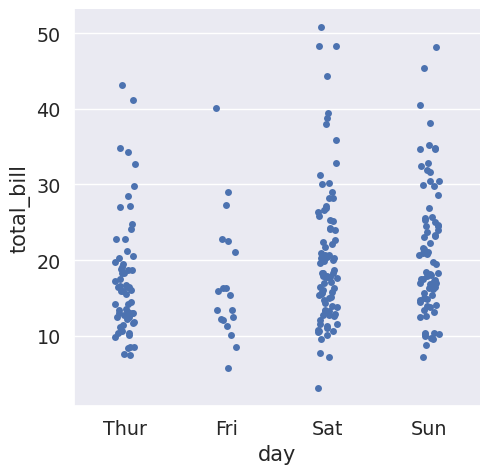

In [14]:
_ = sns.catplot(data=df, x='day', y='total_bill')

Możemy podejrzeć, jak wygląda rozkład zmiennej total_bill dla każdego dnia ujętego w zbiorze danych. Wykresy te można dopasować do własnych potrzeb, np. możemy określić typ jako wykres rojowy (**swarmplot**, parametr kind='swarm').

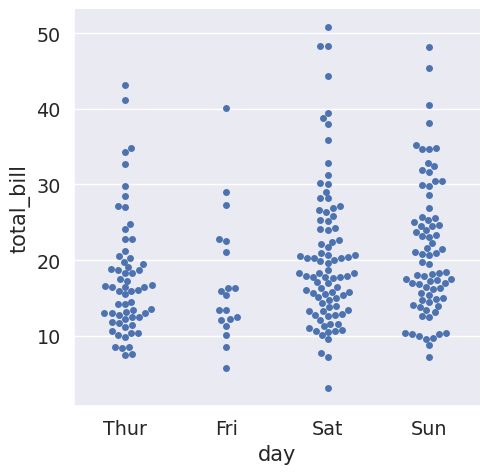

In [15]:
_ = sns.catplot(data=df, x='day', y='total_bill', kind='swarm')

Innym tego typu wykresem jest wykres pudełkowy (**boxplot**), słupkowy (**bar**) lub wiolinowy/skrzypcowy (**violinplot**).

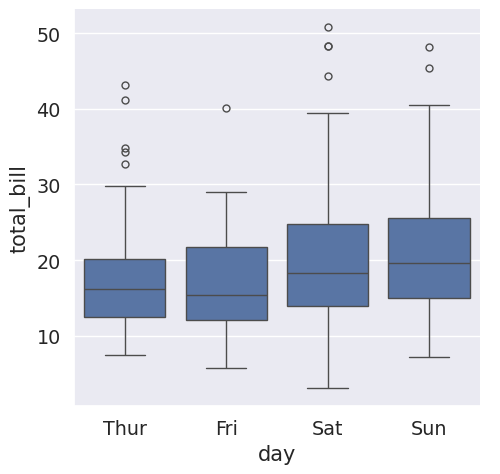

In [16]:
_ = sns.catplot(data=df, x='day', y='total_bill', kind='box')

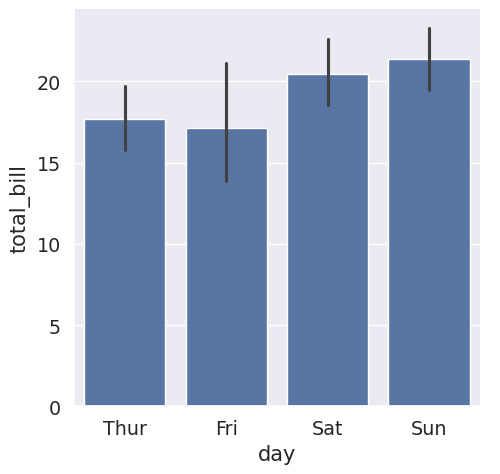

In [17]:
_ = sns.catplot(data=df, x='day', y='total_bill', kind='bar')

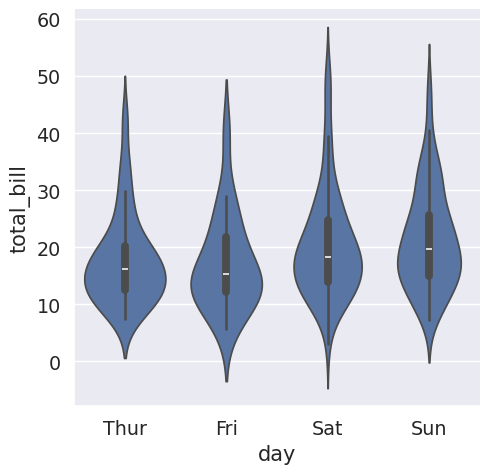

In [18]:
_ = sns.catplot(data=df, x='day', y='total_bill', kind='violin')

Istnieje też inny sposób wykorzystania metody catplot. Jeżeli podamy zmienną kategoryczną jako x, a jako rodzaj **countplot**, zliczy on wystąpienia wartości w zbiorze.

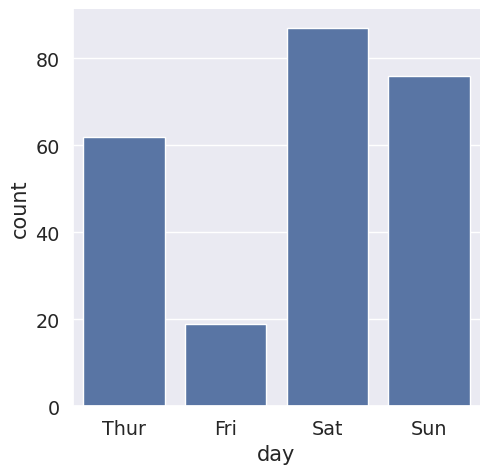

In [19]:
_ = sns.catplot(data=df, x='day', kind='count')

# Titanic data.

Kolejny zbiór danych dot. katastrofy Titanica - danych dot. wszystkich pasażerów z dopiskiem, czy przeżyli, czy nie. Jest to popularny zbiór, wykorzystywany w celach dydaktycznych przy klasyfikacji binarnej w uczeniu maszynowym.

In [20]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Interesuje nas zmienna deck (dot. tego, na którym pokładzie przebywała dana osoba). Ponownie użyjemy metody catplot. Dobierzemy przy tym paletę barw (palette). Ponieważ w przyszłej wersji Seaborna tworzenie takiego wykresu bez odcienia i z legendą ma być wyłączone jako przestarzałe, ustawiamy również hue na tę samą zmienną, co x, oraz legend na False.

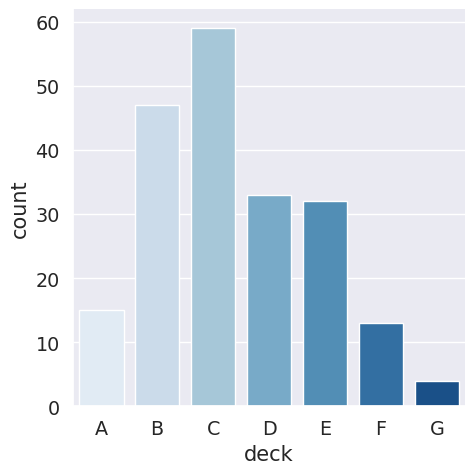

In [21]:
_ = sns.catplot(data=df, x='deck', kind='count', palette='Blues', hue='deck', legend=False)

Podanie zmiennej kategorycznej jako y zamiast jako x pozwala na zmianę orientacji wykresu.

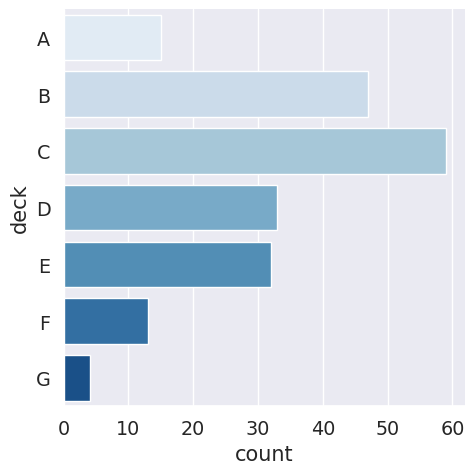

In [22]:
_ = sns.catplot(data=df, y='deck', kind='count', palette='Blues', hue='deck', legend=False)

# Iris data.

Tym razem dane dotyczyć będą płatków irysa (kosaćca). Również jest to bardzo znany zbiór, służący często właśnie nauce wizualizacji, ale też demonstracji regresji liniowej. Na nim zademonstrujemy działanie metody **pairplot**.

In [23]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Wyświetlamy informacje nt. danych. Odwołując się do znajomości zbioru, możemy odnotować, że każda z klas gatunków (species) jest reprezentowana przez 50 rekordów.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Funkcja pairplot generuje siatkę wykresów, która pozwala nam podejrzeć rozkłady i relacje. Na przekątnych mamy histogramy zmiennych, na pozostałych polach - wykresy punktowe. Jako jedyny argument funkcji przekazujemy nasz zbiór danych.

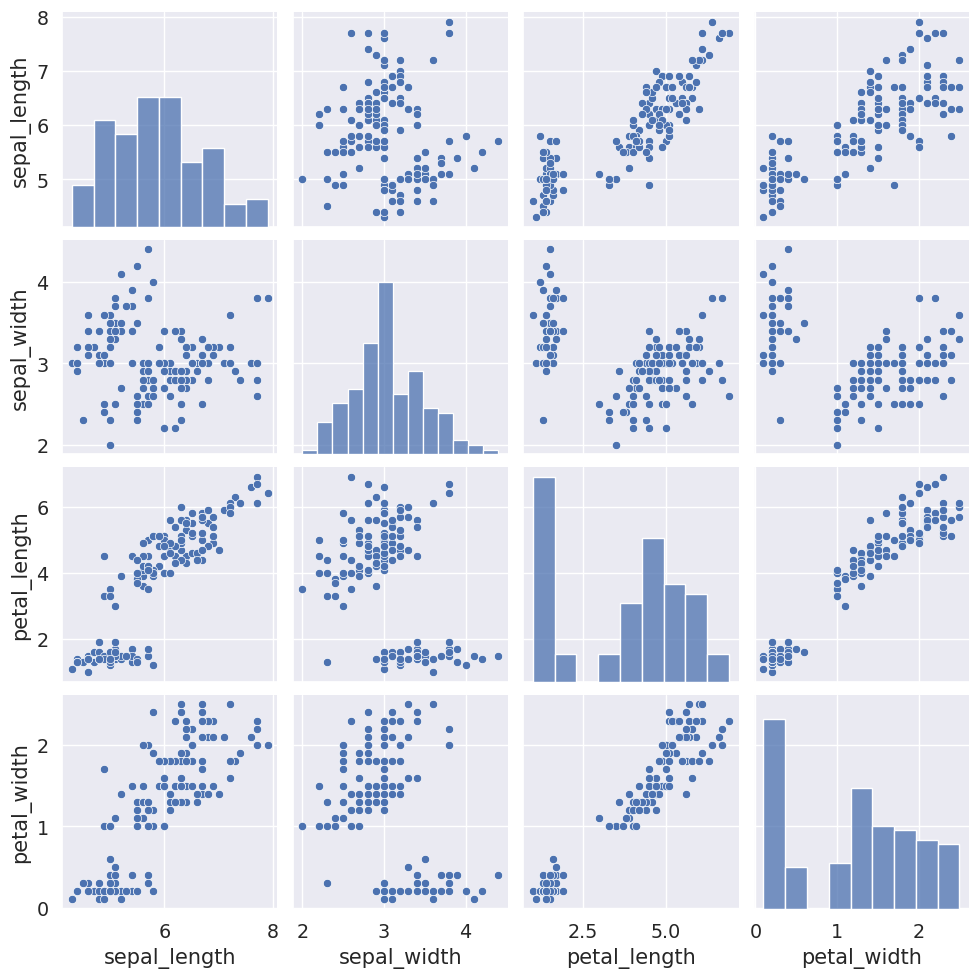

In [25]:
_ = sns.pairplot(df)

Dodanie parametru hue koloruje wykresy wg przekazanej zmiennej (w tym wypadku gatunek rośliny). Histogramy z przekątnej zmieniają histogramy na wykresy oszacowania gęstości (**kdeplot**).

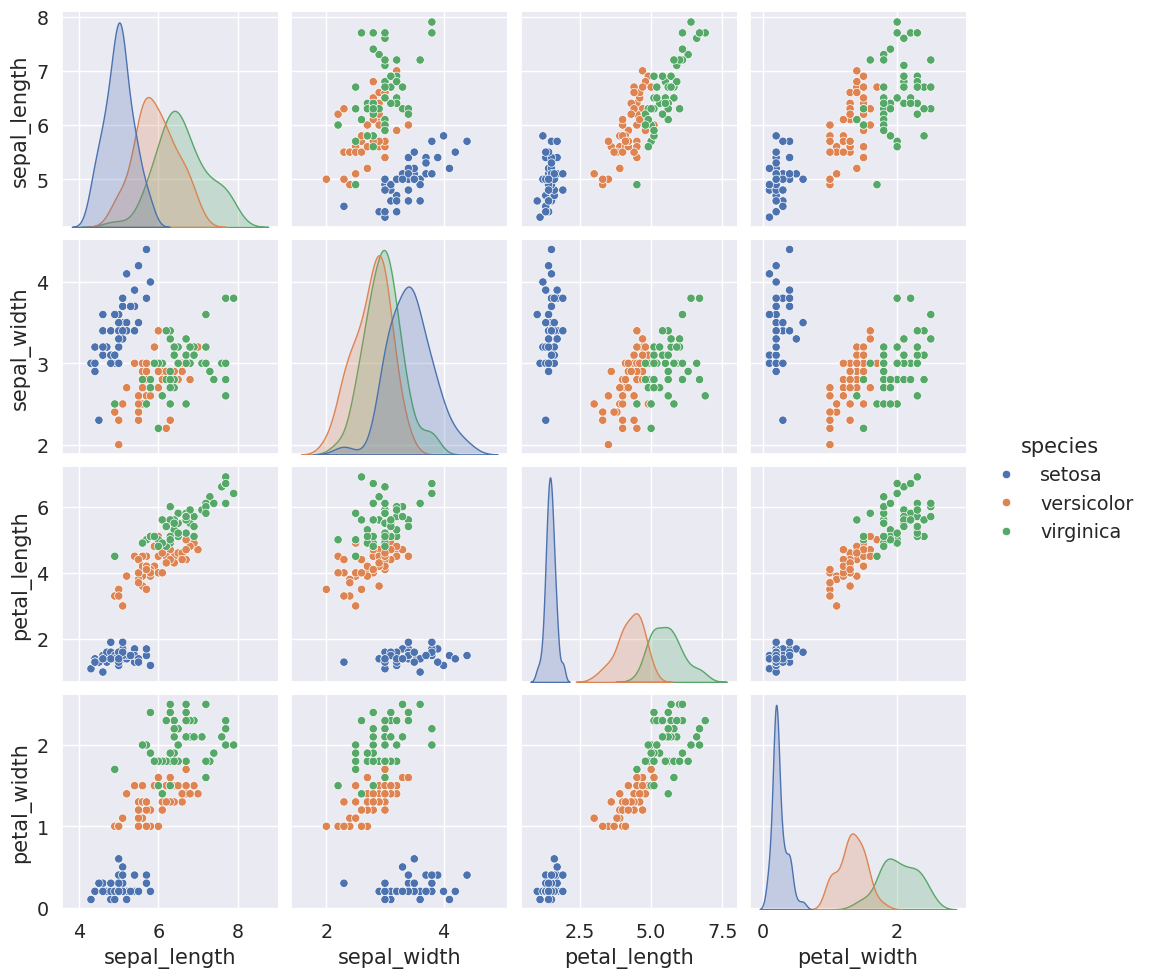

In [26]:
_ = sns.pairplot(df, hue='species')